## Deepface Demo  

In [26]:
# !pip install deepface
from deepface import DeepFace
from deepface_test_functions import *

import matplotlib.pyplot as plt
import pandas as pd 
import csv
import random as rd

import os

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

unit_test_df = pd.read_csv('./data/LFW-csv/unit_test_deepface.csv')

# Read results from Deepface benchmark test  
result_df = pd.read_csv('./result/result_deepface.csv')
deepface_benchmark_gender = pd.read_csv('./result/deepface_benchmark_gender.csv')
result_benchmark_gender_nonperturbed = pd.read_csv('./result/deepface_benchmark_gender_nonperturbed.csv')
result_benchmark_gender_perturbed = pd.read_csv('./result/deepface_benchmark_gender_perturbed.csv')

# Read results from Deepface GUI test
result_gui_face_recognition = pd.read_csv('./result/deepface_gui_face_recognition.csv')
result_gui_gender = pd.read_csv('./result/deepface_gui_gender.csv')

## Benchmark Results from Deepface: 

In [2]:
# Deepface benchmark results: 
result_df

,Model,Dataset,CM_ACC,Precision,Recall,Total Images,TP,TN,FP,FN,Undetected
0,Facenet,LFW,79.0,100.0,58.0,6000,1733,2992,8,1267,0.0
1,VGG-Face,LFW,86.0,81.0,93.0,6000,2799,2334,666,201,0.0
2,OpenFace,LFW,56.0,86.0,15.0,6000,441,2929,71,2559,0.0
3,DeepFace,LFW,64.0,76.0,41.0,6000,1225,2621,379,1775,0.0
4,ArcFace,LFW,94.0,99.0,89.0,6000,2678,2966,34,322,0.0
5,Facenet512,LFW,91.0,99.0,84.0,2000,837,989,11,163,0.0
6,Facenet,LFW,73.0,100.0,46.0,2000,462,1000,0,538,0.0
7,VGG-Face,LFW,80.0,79.0,81.0,2000,805,785,215,195,0.0
8,OpenFace,LFW,56.0,98.0,11.0,2000,114,998,2,886,0.0
9,DeepFace,LFW,57.0,73.0,22.0,2000,219,918,82,781,0.0


In [3]:
# Deepface benchmark with gender split: 
result_benchmark_gender_nonperturbed

,Model,Dataset,CM_ACC,Precision,Recall,Total Images,Gender,TP,TN,FP,FN,Undetected
0,Facenet512,LFW_gender,92.0,97.0,85.0,1000,Male,426,489,11,74,0
1,Facenet512,LFW_gender,91.0,100.0,83.0,1000,Female,414,500,0,86,0
2,Facenet,LFW_gender,73.0,100.0,46.0,1000,Male,232,500,0,268,0
3,Facenet,LFW_gender,73.0,100.0,46.0,1000,Female,232,500,0,268,0
4,VGG-Face,LFW_gender,73.0,68.0,86.0,1000,Male,429,300,200,71,0
5,VGG-Face,LFW_gender,86.0,96.0,75.0,1000,Female,374,485,15,126,0
6,OpenFace,LFW_gender,53.0,94.0,6.0,1000,Male,31,498,2,469,0
7,OpenFace,LFW_gender,58.0,100.0,17.0,1000,Female,83,500,0,417,0
8,DeepFace,LFW_gender,56.0,65.0,23.0,1000,Male,117,438,62,383,0
9,DeepFace,LFW_gender,58.0,84.0,20.0,1000,Female,102,480,20,398,0


In [4]:
# Deepface benchmark with gender split and perturbation: 
result_benchmark_gender_perturbed

,Model,Dataset,CM_ACC,Precision,Recall,Total Images,Gender,TP,TN,FP,FN,Undetected
0,Facenet512,LFW_gender_makeup_heavy,87.0,94.0,80.0,1000,Male,398,476,24,102,0
1,Facenet512,LFW_gender_makeup_heavy,86.0,99.0,73.0,1000,Female,366,498,2,134,0
2,Facenet,LFW_gender_makeup_heavy,67.0,100.0,35.0,1000,Male,174,500,0,326,0
3,Facenet,LFW_gender_makeup_heavy,69.0,100.0,38.0,1000,Female,192,500,0,308,0
4,VGG-Face,LFW_gender_makeup_heavy,73.0,70.0,81.0,1000,Male,404,327,173,96,0
5,VGG-Face,LFW_gender_makeup_heavy,83.0,96.0,69.0,1000,Female,346,487,13,154,0
6,OpenFace,LFW_gender_makeup_heavy,54.0,95.0,8.0,1000,Male,38,498,2,462,0
7,OpenFace,LFW_gender_makeup_heavy,56.0,100.0,12.0,1000,Female,60,500,0,440,0
8,DeepFace,LFW_gender_makeup_heavy,55.0,62.0,25.0,1000,Male,127,422,78,373,0
9,DeepFace,LFW_gender_makeup_heavy,58.0,79.0,22.0,1000,Female,110,471,29,390,0


## Parameter setup:

- Dataset 

- Model

- Metric 

- Backend

- Testing gender

In [125]:
# select a DATASET from data folder:
# LFW, LFW_gender, LFW_gender_makeup_light, LFW_gender_makeup_heavy 
DATASET = "LFW_gender_makeup_heavy"
dataset_dir = f"./data/{DATASET}"

# test with gender split LFW
# DATASET_LFW_SPLIT = "LFW_gender"
# dataset_dir = f"./data/{DATASET_LFW_SPLIT}"

# select a model to run:
# models = ["Facenet512", "Facenet", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
MODEL = "Facenet512"

# Faces are represented as vectors, a face pair of same person should be similar, calculated by different metrics
# metrics = ["cosine", "euclidean", "euclidean_l2"]
METRIC = "euclidean_l2"

# Face detector, backend that helps aligning the face for better accuracy
# backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
BACKEND = 'opencv'

# Select 'Male' or 'Female'
TEST_GENDER = 'Female'

# Image name 
# Luis_Ernesto_Derbez_Bautista, Junichiro_Koizumi, Vicente_Fox
# Angelina_Jolie, Mariangel_Ruiz_Torrealba, Venus_Williams
IMAGE_NAME = "Junichiro_Koizumi"

### Deepface Demo testing: 

#### Facial Analysis for gender predection: 

- Predicts the gender of the image 

In [8]:
def deepface_gender_test(multiple=False):

    data_people = f"./data/{DATASET}/{TEST_GENDER}/{IMAGE_NAME}"
    # Deepface Test one single image gender prediction 
    if not multiple:
        # sample image
        data_images = os.listdir(data_people)
        data_image = f"{data_people}/{rd.sample(data_images, 1).pop()}"   ### can manual select image from here  ###
        data_res = DeepFace.analyze(data_image, actions =["gender"], enforce_detection=False)

        # Show result: 
        print(data_res)
        plt.imshow(plt.imread(data_image))

        return {"Data directory": data_image, "Gender": data_res['gender']}

    # Deepface Test multiple images gender prediction 
    else:
        for i in os.listdir(data_people):
            data_image = f"{data_people}/{i}"
            data_res = DeepFace.analyze(data_image, actions =["gender"], enforce_detection=False)

            # Show result: 
            print(data_res)
            plt.imshow(plt.imread(data_image))


1/1 [==============================] - 0s 393ms/step
{'gender': 'Man', 'region': {'x': 72, 'y': 71, 'w': 115, 'h': 115}}


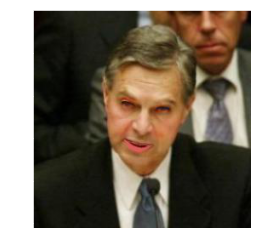

In [11]:
df_gender_res = deepface_gender_test()

### Output and Save results

In [55]:
result_new = pd.DataFrame([df_gender_res])

frames = [result_gui_gender, result_new]
result_gui_new = pd.concat(frames)

result_gui_new = result_gui_new.reset_index()
result_gui_new.drop(columns=['index'], inplace=True)
result_gui_new

,Data directory,Gender
0,./data/LFW/Luis_Ernesto_Derbez_Bautista/Luis_E...,Man
1,./data/LFW/Angelina_Jolie/Angelina_Jolie_0002.jpg,Woman
2,./data/LFW_gender_makeup_light/Male/Junichiro_...,Man
3,./data/LFW_gender_makeup_light/Female/Mariange...,Woman
4,./data/LFW_gender_makeup_light/Male/Vicente_Fo...,Man
5,./data/LFW_gender_makeup_light/Female/Venus_Wi...,Man
6,./data/LFW_gender_makeup_heavy/Male/Vicente_Fo...,Man
7,./data/LFW_gender_makeup_heavy/Female/Venus_Wi...,Man


In [52]:
# Output result to CSV and read results
result_gui_new.to_csv("./result/deepface_gui_gender.csv", index=False)
result_gui_gender = pd.read_csv('./result/deepface_gui_gender.csv')

## Deepface Facial Recognition with verification: 
- Verifies the face with 1 to 1 testing method according to the LFW benchmark test

In [126]:
unit_test_df = pd.read_csv('./data/LFW-csv/unit_test_deepface.csv')
deepface_benchmark_res, perturbed_data = deepface_benchmark_lfw_split(DATASET, dataset_dir, unit_test_df,\
                                                                     MODEL, METRIC, BACKEND, TEST_GENDER)

1/1 [==============================] - 0s 73ms/step


In [127]:
print(f"Accuracy of {deepface_benchmark_res['Model']} is {deepface_benchmark_res['CM_ACC']}% \
for {deepface_benchmark_res['Gender']} in {deepface_benchmark_res['Dataset']} dataset")

Accuracy of Facenet512 is 100.0% for Female in LFW_gender_makeup_heavy dataset


### Cross validation test: 
- Verifies the face with 1 to Many testing method 

In [16]:
def deepface_face_recognition_test():
    # Get the images from the person
    data_people = f"./data/{DATASET}/{TEST_GENDER}/{IMAGE_NAME}"
    data_images = []
    for image in os.listdir(data_people):
        data_images.append(f"{data_people}/{image}")
        
    # Test Deepface face recognition with face verification 
    result = []
    
    if len(data_images) > 1:
    
        # Select target image
        for image_index in range(len(data_images)):
            truths = []
            target_image = data_images[image_index]

            for img in data_images:
                data_res = DeepFace.verify(target_image, img, model_name = MODEL, 
                                            distance_metric = METRIC, detector_backend = BACKEND, enforce_detection=False)
                truths.append(data_res["verified"])

            accuracy = round(sum(truths) / (len(data_images)), 2) * 100
            result.append({f"{target_image}": accuracy})
    else:
        raise Exception("Image folder contains less than 2 images")

    overall_accuracy = round(sum([list(i.values())[0] for i in result]) / len(result), 2)

    return {"Model": MODEL, "Accuracy": overall_accuracy, "Gender": TEST_GENDER}, result

In [20]:
df_face_recognition_res, result = deepface_face_recognition_test()

1/1 [==============================] - 0s 59ms/step


In [21]:
for res in result:
    print(res)

print(f"\nAccuracy of {df_face_recognition_res['Model']} is {df_face_recognition_res['Accuracy']}")

{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0001.jpg': 97.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0004.jpg': 97.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0007.jpg': 94.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0008.jpg': 94.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0009.jpg': 97.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0010.jpg': 94.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0012.jpg': 97.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0013.jpg': 97.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0014.jpg': 94.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0017.jpg': 94.0}
{'./data/LFW_gender_makeup_heavy/Male/Junichiro_Koizumi/Junichiro_Koizumi_0018.jpg': 3.0}


## Output and read results to CSV

In [38]:
result_new = pd.DataFrame([df_face_recognition_res])

frames = [result_gui_face_recognition, result_new]
result_gui_new_fr = pd.concat(frames)

result_gui_new_fr = result_gui_new_fr.reset_index()
result_gui_new_fr.drop(columns=['index'], inplace=True)
result_gui_new_fr

,Model,Accuracy,Gender
0,Facenet512,100.0,Male
1,Facenet512,95.0,Female
2,Facenet512,98.0,Male
3,Facenet512,100.0,Female
4,Facenet512,94.0,Male
5,Facenet512,100.0,Female


In [32]:
# Output result to CSV and read results
result_gui_new_fr.to_csv("./result/deepface_gui_face_recognition.csv", index=False)
result_gui_face_recognition = pd.read_csv('./result/deepface_gui_face_recognition.csv')